In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from matplotlib import rcParams

%matplotlib inline 

plt.style.use('fivethirtyeight')
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['text.color'] = 'k'


In [2]:
from sklearn.datasets import fetch_mldata

In [3]:
digits = fetch_mldata('MNIST original')

In [4]:
X,y = digits['data'],digits['target']

In [5]:
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

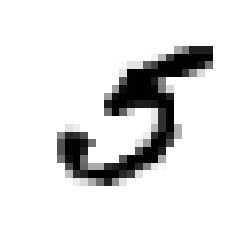

In [7]:
#lets grab one digit and plot it
import matplotlib
digit = X[36000]
digit_image = digit.reshape(28,28)
plt.imshow(digit_image,cmap=matplotlib.cm.binary,interpolation='nearest')
plt.axis('off')
plt.show()

In [8]:
#lets split the dataset and shuffle the data

X_train, X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

#shuffling the index

shuffle = np.random.permutation(60000)

X_train,y_train = X_train[shuffle],y_train[shuffle]

#now we are instrested in only labels where 5 occures

y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

In [9]:
#normalizing the dataset and reshaping the data
y_train_5 = y_train_5.reshape(1,60000)
y_test_5 = y_test_5.reshape(1,10000)
X_train = (X_train.T)/255
X_test = (X_test.T)/255

In [10]:
#writing sigmoid function

def sigmoid(z):
    return 1/(1+np.exp(-z))

In [11]:
#initializing W and b for the logistic regression. for this project we will initialize it with 0

def initialize_with_zero(dim):
    #dim -> Dimension
    
    w = np.zeros(shape=(dim,1))
    b= 0
    
    return w,b

In [18]:
#Now performing forward pass
def propagate(w,b,X,Y):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T,X)+b)
    cost = (-1/m)* np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))
    
    #backward prop
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)
    
    cost = np.squeeze(cost)
    grads = {'dw':dw,'db':db}
    return grads,cost

In [19]:
#now writing gradient descent for optimization
def optimize(w,b,X,Y,num_iterations,learning_rate,print_cost=False):
    
    costs = []
    
    for i in range(num_iterations):
        grads, cost = propagate(w,b,X,Y)
        
        dw = grads['dw']
        db = grads['db']
        
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        if i % 100 == 0:
            costs.append(cost)
            
    params = {'w':w,'b':b}
    grads = {'dw':dw,'db':db}
    
    
    return params,grads,costs
            
        
    

In [20]:
#Now predicting the y

def predict(w,b,X):
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0],1)
    
    A = sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
        
    return Y_prediction



In [21]:
#merging all function into model function
def model(X_train,y_train,X_test,y_test,num_iterations=2000,learning_rate=0.5,print_cost=False):
    w,b = initialize_with_zero(X_train.shape[0])
    parameters, grads, costs = optimize(w, b, X_train, y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

  
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [22]:
d = model(X_train, y_train_5, X_test, y_test_5, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

train accuracy: 93.285 %
test accuracy: 93.61 %


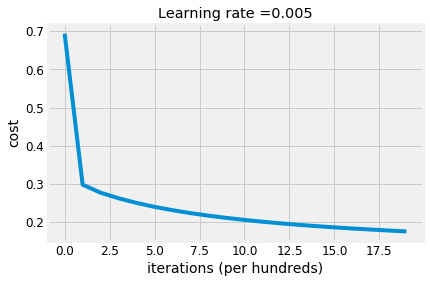

In [23]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()